In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=100000, precision=3)
import sys
import pandas as pd

from skimage import data, io, filters
from skimage.transform import resize


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



#data = tfds.load('fashion_mnist')
print("done")

done


In [9]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))
img_train = img_train.reshape((60000, 28, 28))
nsamples, nx, ny = img_train.shape
img_train = img_train.reshape(nsamples, nx * ny)

In [10]:
nsamples, nx, ny, _ = img_test.shape
img_test = img_test.reshape(nsamples, nx * ny)
print(img_test.shape)
Xtr=img_train
Xte=img_test

(10000, 784)


In [11]:
def bucket3(arr,b_num):
    
    new_arr=np.zeros(arr.shape)
    for img in range(len(arr)):
        cb=0
        th=np.max(arr[img])/b_num
        threshold=th
        while(cb<b_num):
            add_arr=(arr[img]>threshold)*1
            new_arr[img]= np.add(new_arr[img],add_arr)
            threshold+=th
            cb+=1
        
    return new_arr

In [15]:
bucketted=bucket3(Xtr,8)

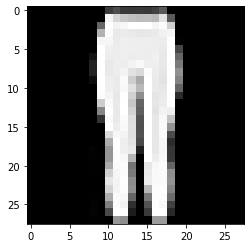

In [16]:
plt.imshow(Xtr[1].reshape(28,28), cmap='gray')

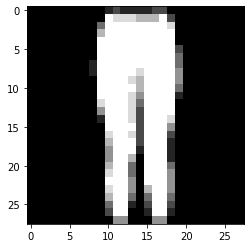

In [17]:
plt.imshow(bucketted[1].reshape(28,28), cmap='gray')

In [ ]:
# grid search
buckets=[5,10,25,50]
depth=[2,5,7,10]
pca_comp=[10,20,30,50]
#grid_arr=np.empty_like(np.array,shape=(len(buckets),len(depth),len(pca_comp)))
#np.zeros((len(buckets),len(depth),len(pca_comp)))
def gridsearch1(buckets,depth,pca_comp,Xtra,Xtes,label_train):
    grid_arr=np.empty_like(np.array,shape=(len(buckets),len(depth),len(pca_comp)))
    for b,buck in enumerate(buckets):
        for d, dep in enumerate(depth):
            for c, com in enumerate(pca_comp):
                bucket_train=bucket3(Xtra,buck)
                bucket_test=bucket3(Xtes,buck)
                pca = PCA(n_components=com)
                Xtr_f = pca.fit_transform(bucket_train)
                Xte_f = pca.transform(bucket_test)
                classifier = RandomForestClassifier(max_depth=dep, random_state=0)
                classifier.fit(Xtr_f, label_train)
                grid_arr[b,d,c] = classifier.predict(Xte_f)
    return grid_arr
print("done")

In [ ]:
buckets=[8,12,16,20]
depth=[20,30,35,40]
pca_comp=[30,40,50,60]
xb=Xtr
xz=Xte
lb=label_train
le=label_test
print(xb.shape)
print(xz.shape)
ga=gridsearch1(buckets,depth,pca_comp,xb,xz,lb)

In [ ]:
y_hat=np.zeros((4,4))
#for i in range(len(grid_search)):
for j in range(len(ga[0])):
    for k in range(len(ga[0][0])):
        y_hat[j,k]=accuracy_score(le, ga[0,j,k])
                 

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(y_hat, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+depth)
ax.set_yticklabels(['']+pca_comp)
plt.show()

In [18]:
bucket_train=bucket3(Xtr,12)
bucket_test=bucket3(Xte,12)
pca = PCA(n_components=50)
Xtr_f = pca.fit_transform(bucket_train)
Xte_f = pca.transform(bucket_test)
classifier = RandomForestClassifier(max_depth=30, random_state=0)
classifier.fit(Xtr_f, label_train)
accuracy_score(label_test, classifier.predict(Xte_f))

0.8605